Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.inspection import PartialDependenceDisplay
import joblib

Step 2: Load the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/air_quality_health_impact_data.csv')

# Display the first 5 rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (5811, 15)


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


Step 3: Exploratory Data Analysis (EDA)

In [ ]:
# Display basic statistics
print(df.describe())

# Data types of each column
print("\nData Types:\n", df.dtypes)

# Summary of the dataset
print("\nDataset Info:\n")
df.info()

          RecordID          AQI         PM10        PM2_5          NO2  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean   2906.000000   248.438476   148.654997   100.223714   102.293445   
std    1677.635538   144.777638    85.698500    58.096612    57.713175   
min       1.000000     0.005817     0.015848     0.031549     0.009625   
25%    1453.500000   122.951293    75.374954    49.435171    53.538538   
50%    2906.000000   249.127841   147.634997   100.506337   102.987736   
75%    4358.500000   373.630668   222.436759   151.340260   151.658516   
max    5811.000000   499.858837   299.901962   199.984965   199.980195   

               SO2           O3  Temperature     Humidity    WindSpeed  \
count  5811.000000  5811.000000  5811.000000  5811.000000  5811.000000   
mean     49.456838   149.312431    14.975500    54.776853     9.989177   
std      28.530329    86.534240    14.483067    26.020786     5.776950   
min       0.011023     0.001661    -9

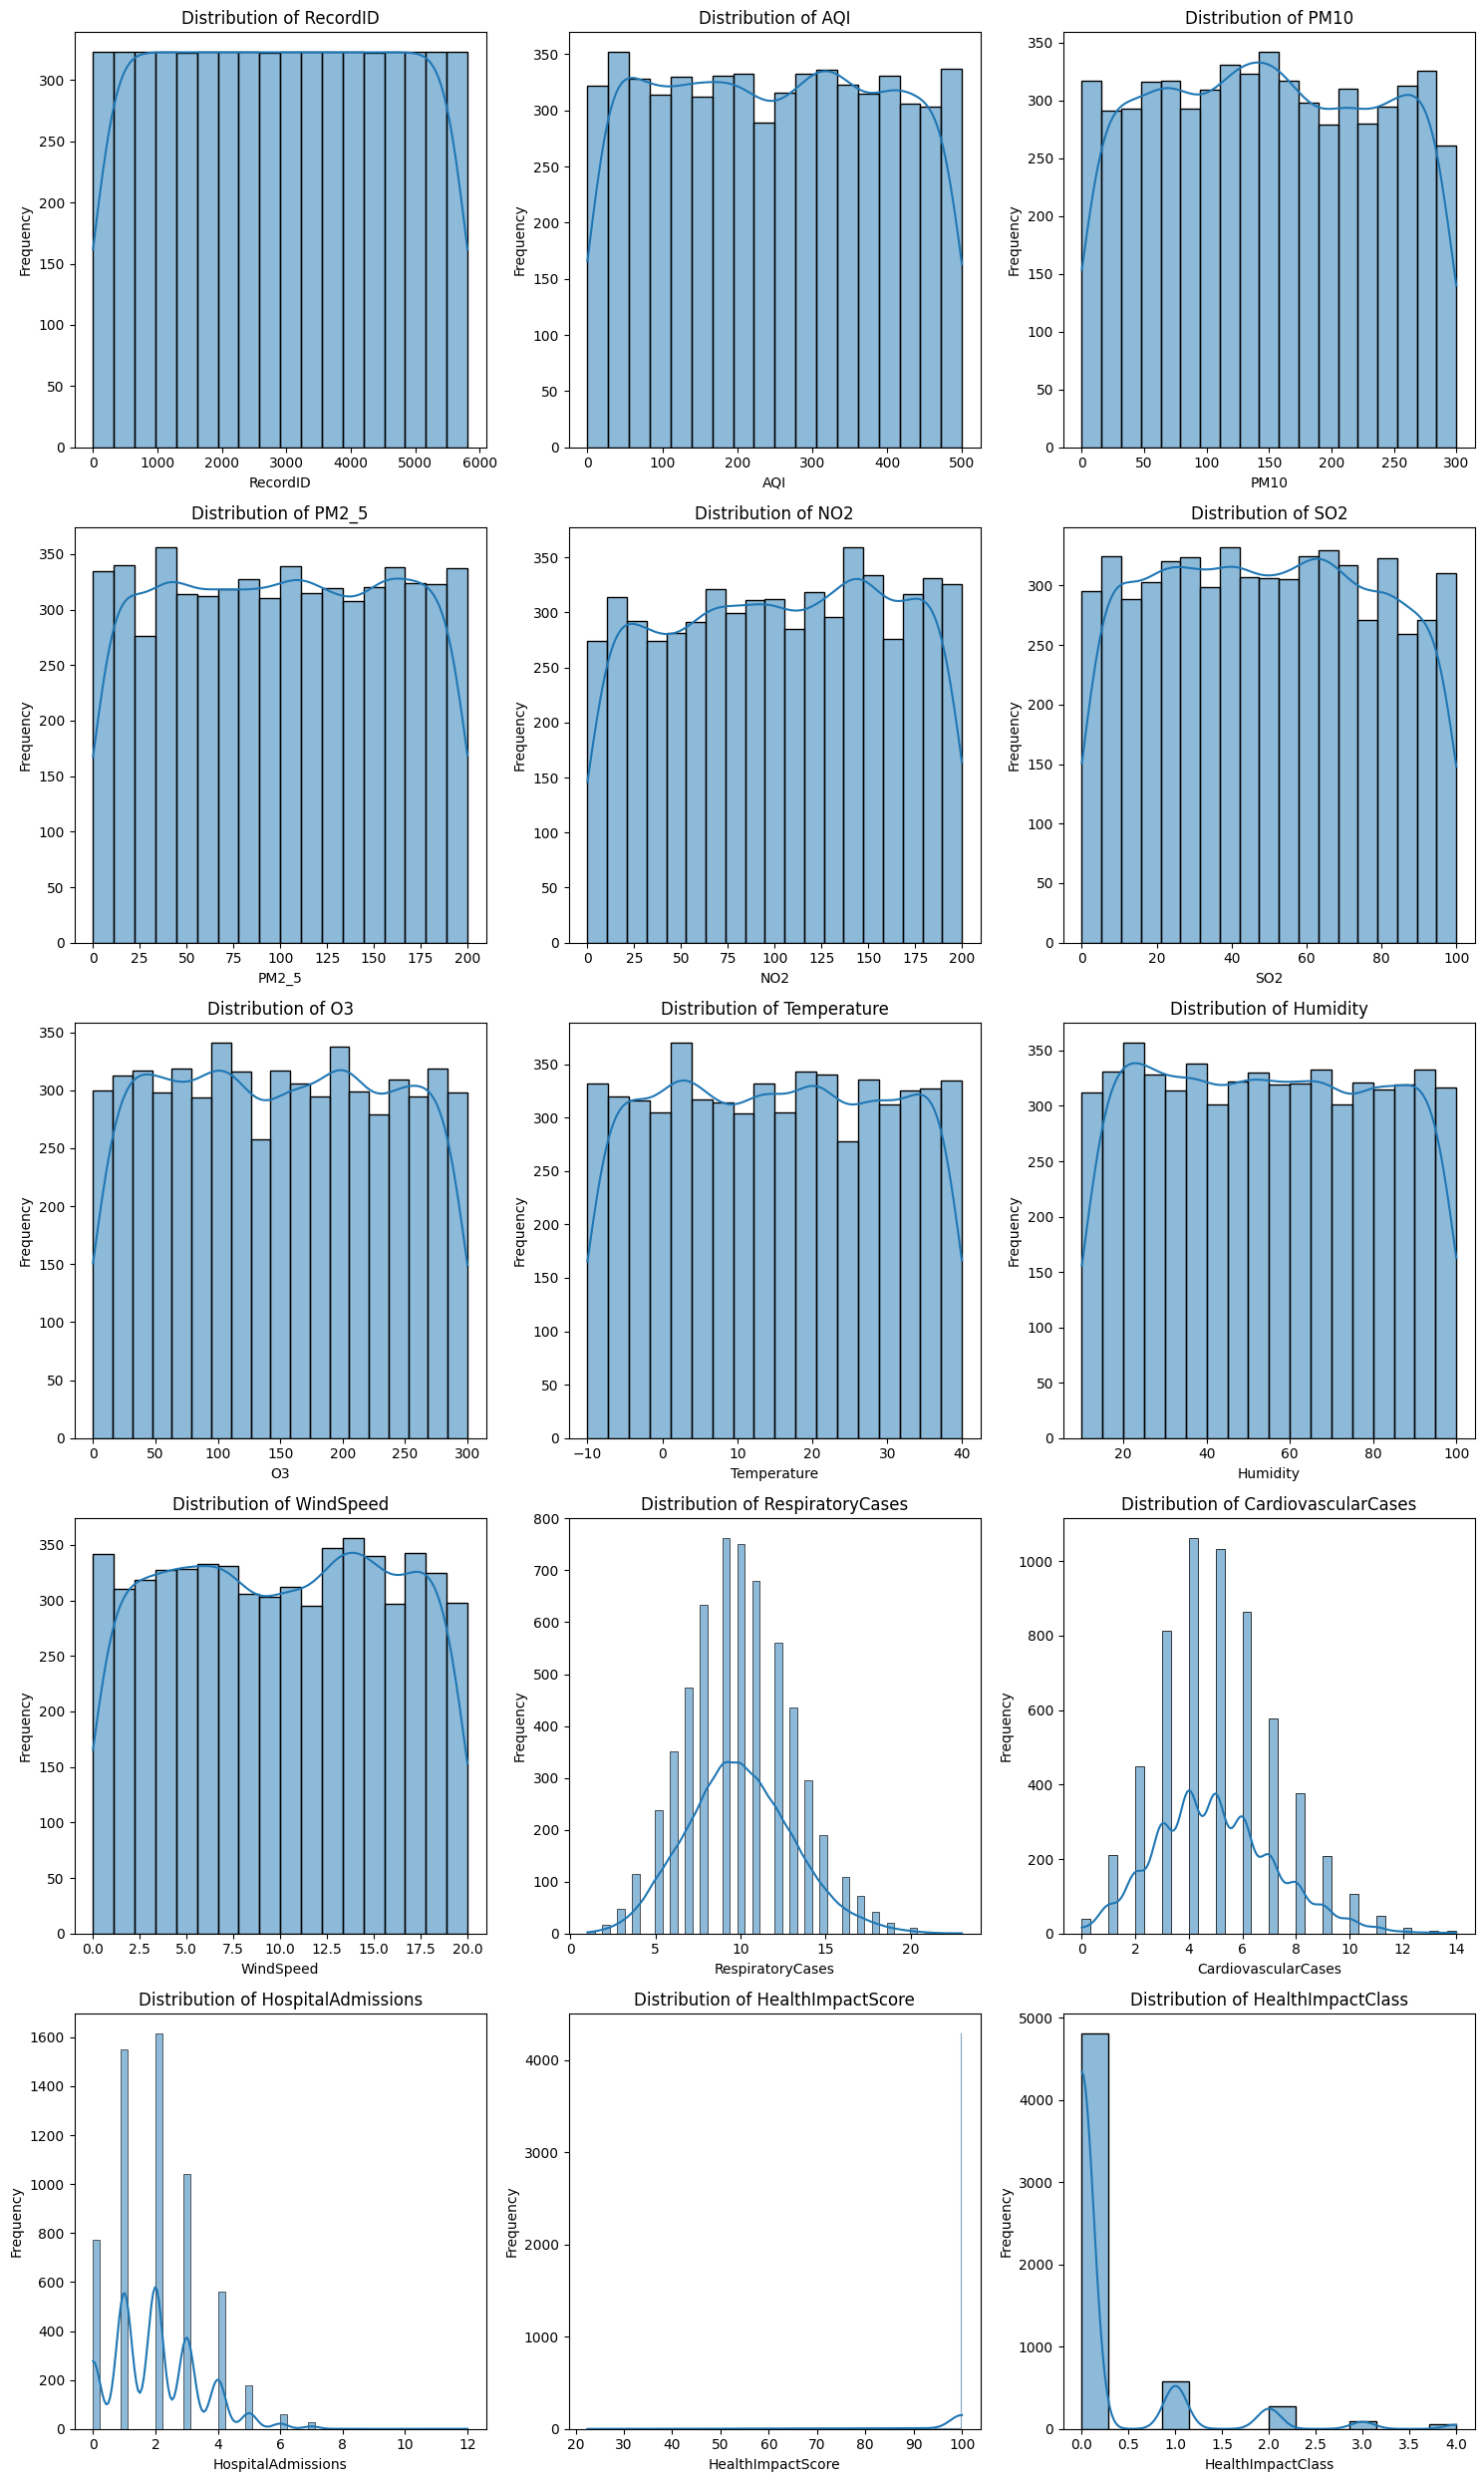

In [ ]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=np.number).columns
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

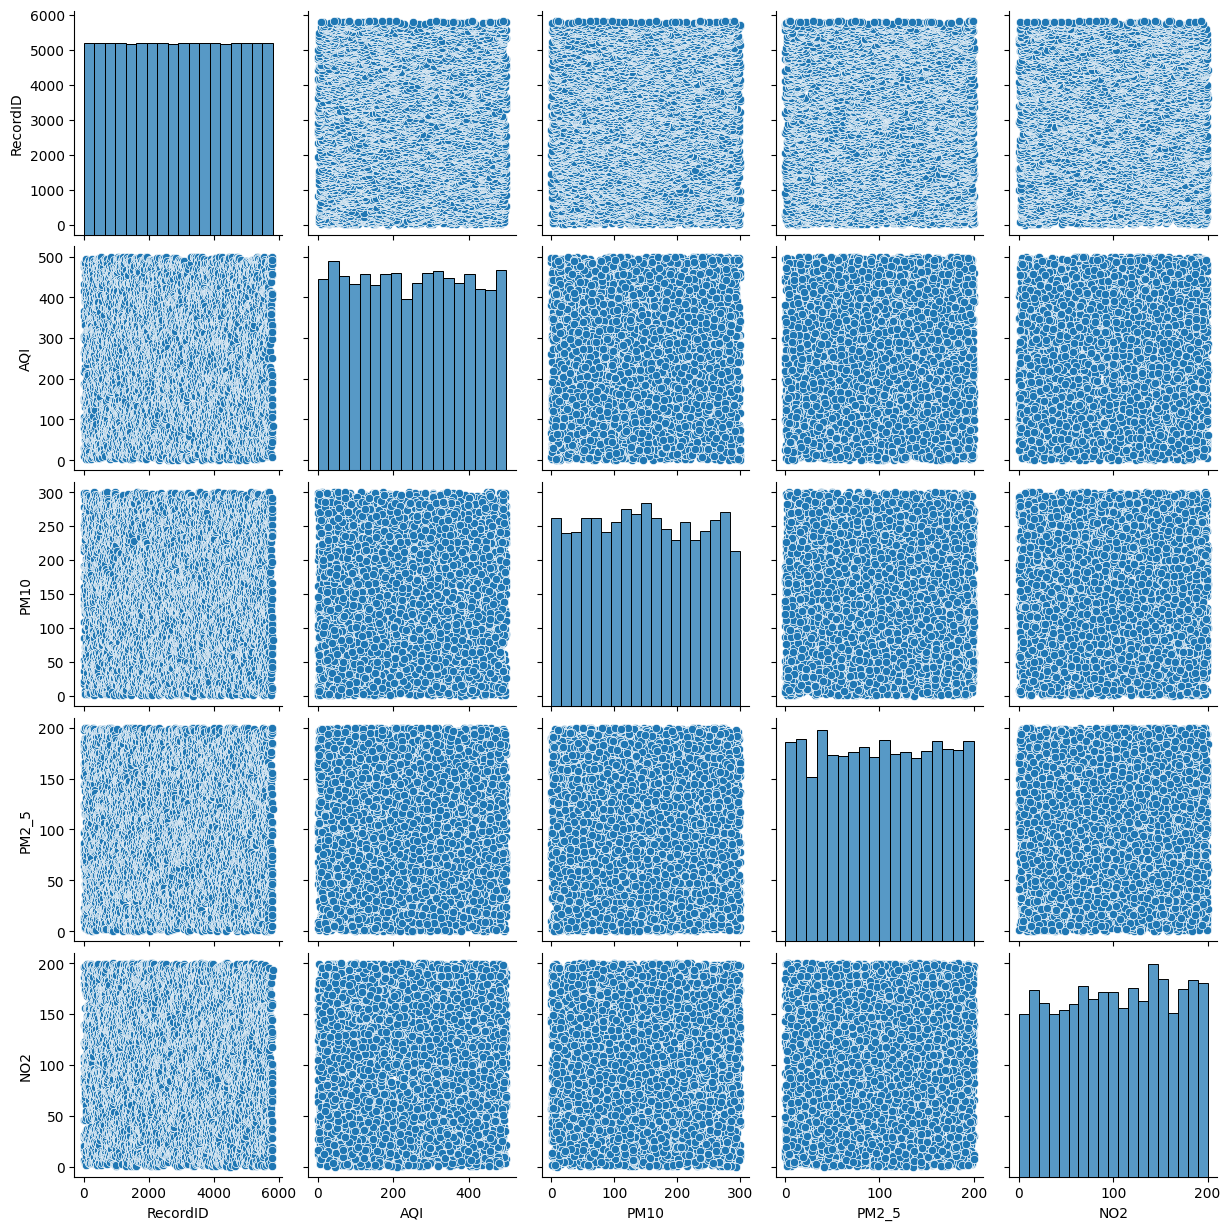

In [ ]:
# Analyze relationships between features
sns.pairplot(df[numerical_features[:5]])
plt.show()

In [ ]:
#range of each features
for col in df.columns:
  print(f"Range of {col}: [{df[col].min()}, {df[col].max()}]")

Range of RecordID: [1, 5811]
Range of AQI: [0.0058173776830705, 499.8588366430653]
Range of PM10: [0.0158480796890403, 299.90196157262767]
Range of PM2_5: [0.0315489156113457, 199.9849653666353]
Range of NO2: [0.0096247788623493, 199.98019540184632]
Range of SO2: [0.0110231801822457, 99.96956093547604]
Range of O3: [0.0016610027213981, 299.9368115437786]
Range of Temperature: [-9.99099805080186, 39.9634342598158]
Range of Humidity: [10.001506263214129, 99.9974932631184]
Range of WindSpeed: [0.0020942159628711, 19.999139087375404]
Range of RespiratoryCases: [1, 23]
Range of CardiovascularCases: [0, 14]
Range of HospitalAdmissions: [0, 12]
Range of HealthImpactScore: [22.44848790137248, 100.0]
Range of HealthImpactClass: [0.0, 4.0]


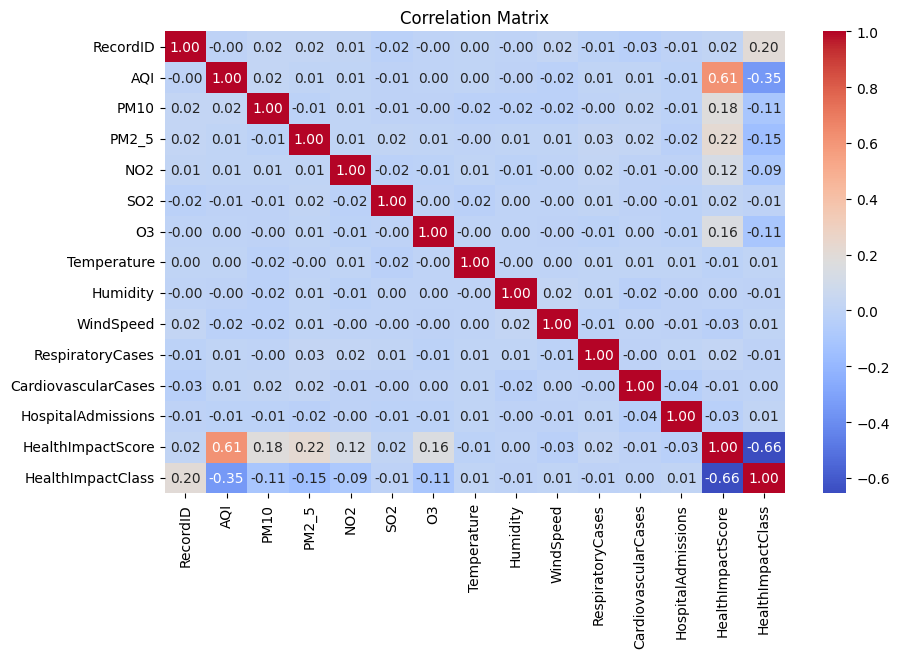

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' , fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Step 4: Data Preprocessing

In [ ]:
# Handling missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


In [ ]:
# Handling duplicate values
print("\nDuplicate Values:")
print(df.duplicated().sum())



Duplicate Values:
0


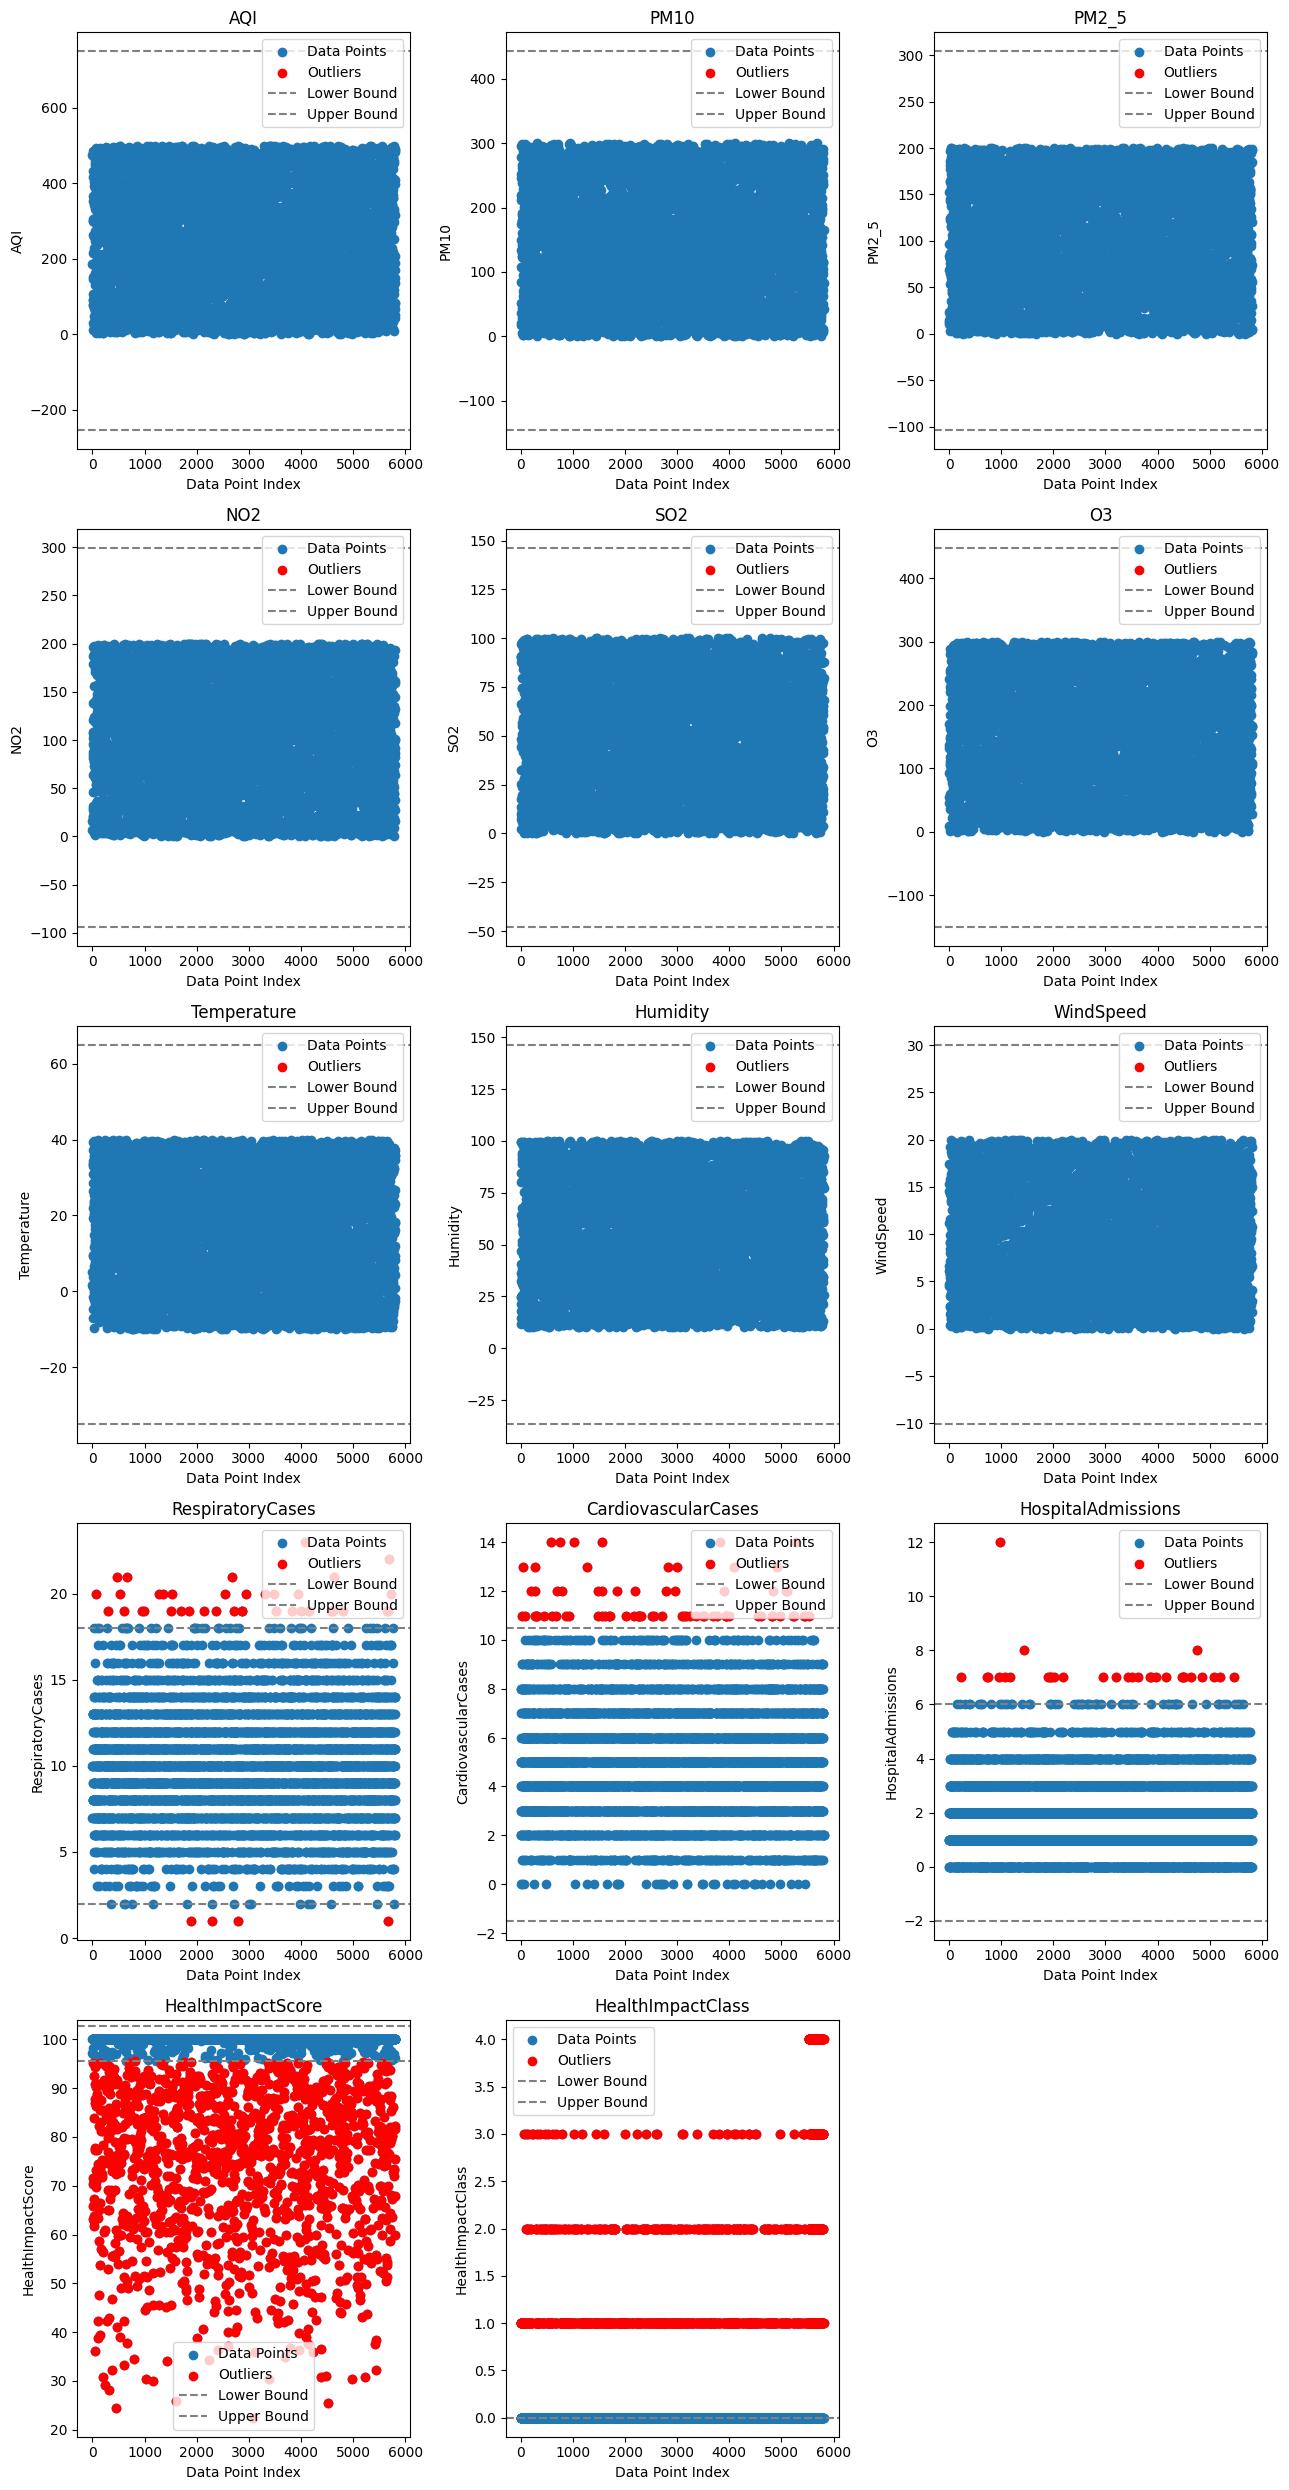

In [ ]:
#checking the outliers
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

df_numerical = df.select_dtypes(include=['float64', 'int64']).copy()
df_numerical = df_numerical.drop(columns=['RecordID','HealthImpactScore '], errors='ignore')

num_cols = len(df_numerical.columns)
nrows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(13, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(df_numerical.columns):
    outliers, lower_bound, upper_bound = find_outliers_iqr(df_numerical, col)
    axes[i].scatter(df_numerical.index, df_numerical[col], label="Data Points")
    axes[i].scatter(outliers.index, outliers[col], color='red', label="Outliers")
    axes[i].axhline(lower_bound, color='gray', linestyle='--', label="Lower Bound")
    axes[i].axhline(upper_bound, color='gray', linestyle='--', label="Upper Bound")
    axes[i].set_title(col)
    axes[i].set_xlabel("Data Point Index")
    axes[i].set_ylabel(col)
    axes[i].legend()

for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
#Removing the outliers
def remove_outliers_iqr(df, columns_to_check):
    df_cleaned = df.copy()
    for col in columns_to_check:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

columns_to_check = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
                    if col not in ['RecordID', 'healthimpactscore', 'hospitaladmission']]

df_no_outliers = remove_outliers_iqr(df, columns_to_check)

print(f"Original Shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")

Original Shape: (5811, 15)
Shape after outlier removal: (4177, 15)


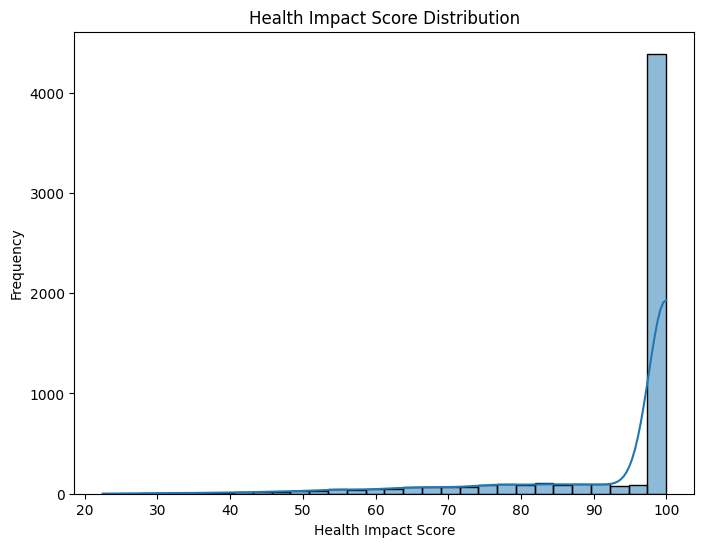

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
y = df['HealthImpactScore']
sns.histplot(y, bins=30, kde=True)
plt.title('Health Impact Score Distribution')
plt.xlabel('Health Impact Score')
plt.ylabel('Frequency')
plt.show()


#this is left-skewed (negatively skewed), means most scores are high, with fewer low scores.


Lambda value used for Box-Cox: 10.752581798245394


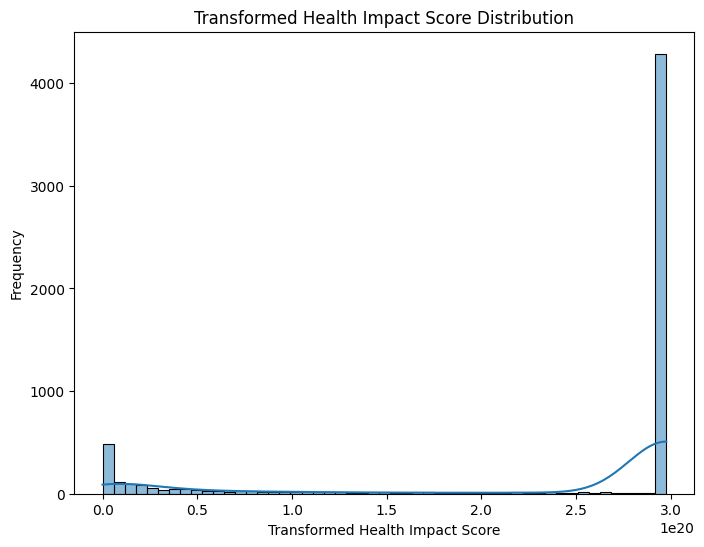

In [ ]:
#reducing the skewness
import scipy.stats as stats

def transform_target(df, column):
    df_transformed = df.copy()
    min_val = df_transformed[column].min()
    if min_val <= 0:
        df_transformed[column] = df_transformed[column] - min_val + 1

    transformed_data, lambda_value = stats.boxcox(df_transformed[column]) # Applied Box-Cox transformation

    df_transformed[column + '_transformed'] = transformed_data
    return df_transformed, lambda_value

df_transformed, lambda_value = transform_target(df, 'HealthImpactScore')

print(f"Lambda value used for Box-Cox: {lambda_value}")

# Visualize the transformed distribution:
plt.figure(figsize=(8, 6))
sns.histplot(df_transformed['HealthImpactScore_transformed'], kde=True)
plt.title('Transformed Health Impact Score Distribution')
plt.xlabel('Transformed Health Impact Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Separate features and target
X = df.drop(['RecordID', 'HealthImpactScore', 'HealthImpactClass', 'AQI', 'HospitalAdmissions','CardiovascularCases','RespiratoryCases' ], axis=1)
y = df['HealthImpactScore']

In [ ]:
X

,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed
0,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755
1,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422
2,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384
3,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500
4,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733
...,...,...,...,...,...,...,...,...
5806,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129
5807,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549
5808,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698
5809,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393


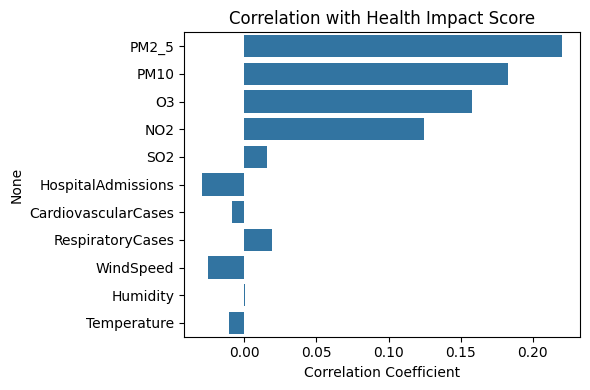

In [ ]:
#correlation with HealthImpactScore
columns_to_plot = ['PM2_5', 'PM10', 'O3', 'NO2', 'SO2','HospitalAdmissions','CardiovascularCases','RespiratoryCases','WindSpeed','Humidity','Temperature',]
correlations = df[columns_to_plot].corrwith(df['HealthImpactScore'])

plt.figure(figsize=(6, 4))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation with Health Impact Score')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
# Handle class imbalance using oversampling
X_minority = X[y < y.median()]
y_minority = y[y < y.median()]
X_upsampled, y_upsampled = resample(X_minority, y_minority, replace=True, n_samples=len(X) // 2, random_state=42)
X = pd.concat([X, X_upsampled])
y = pd.concat([y, y_upsampled])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 5: Feature Selection

In [ ]:
# feature selection using Recursive Feature Elimination (RFE) - good for random foreset
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator=rf, n_features_to_select=8)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)



Selected Features: Index(['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity',
       'WindSpeed'],
      dtype='object')


In [ ]:
# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected Features:", list(selected_features))

Selected Features: ['PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']


Step 6: Model Training & Evaluation

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVM': SVR()
}

In [ ]:
# Train and evaluate models using k-fold
results = {}
k = 5

for name, model in models.items():
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train_selected, y_train):
        X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        mse_scores.append(mean_squared_error(y_val_fold, y_pred))
        r2_scores.append(r2_score(y_val_fold, y_pred))
        mae_scores.append(mean_absolute_error(y_val_fold, y_pred))

    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)
    avg_mae = np.mean(mae_scores)

    results[name] = {
        'model': model,
        'mse': avg_mse,
        'r2': avg_r2,
        'mae': avg_mae
    }

    print(f"\n{name} Results (K-Fold):")
    print(f"Mean Squared Error (mse): {avg_mse:.4f}")
    print(f"R-squared (r2): {avg_r2:.4f}")
    print(f"Mean Absolute Error (mae): {avg_mae:.4f}")


Linear Regression Results (K-Fold):
Mean Squared Error (mse): 225.0946
R-squared (r2): 0.2012
Mean Absolute Error (mae): 12.1575

Random Forest Results (K-Fold):
Mean Squared Error (mse): 94.6851
R-squared (r2): 0.6637
Mean Absolute Error (mae): 6.6572

XGBoost Results (K-Fold):
Mean Squared Error (mse): 100.9122
R-squared (r2): 0.6416
Mean Absolute Error (mae): 6.6807

SVM Results (K-Fold):
Mean Squared Error (mse): 261.8198
R-squared (r2): 0.0711
Mean Absolute Error (mae): 11.1046


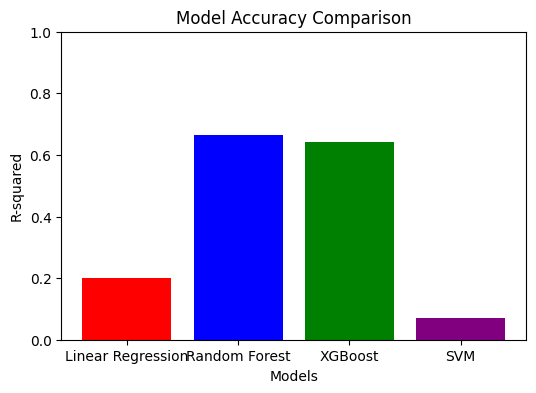

In [ ]:
#model accurary comparision
accuracy_scores = []
model_names = []
colors = ['red', 'blue', 'green', 'purple']

for i, (name, result) in enumerate(results.items()):
    accuracy_scores.append(result['r2'])
    model_names.append(name)


plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


Step 7: Hyperparameter Tuning (Best Model: RF)

In [ ]:
# Best model selection
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [ ]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='r2',
    n_jobs=1,
    random_state=42
)

random_search.fit(X_train_selected, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate tuned model
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
print(f"Test R2 Score of best Random Forest model: {r2}")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Score: 0.6027142620513405
Test R2 Score of best Random Forest model: 0.6826709351347067


Test R2 Score of best Random Forest model: 0.6826709351347067


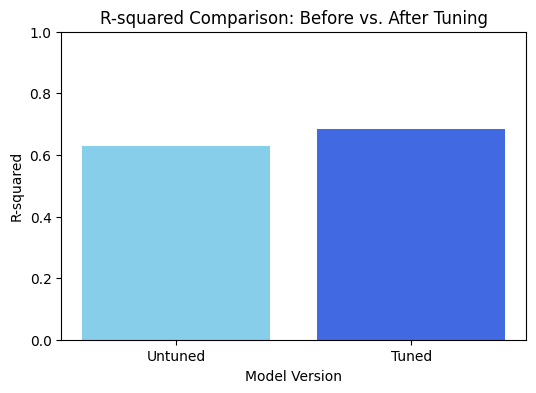

R-squared (Untuned): 0.6298
R-squared (Tuned): 0.6827


In [ ]:
y_pred_untuned = best_model.predict(X_test_selected)
r2_untuned = r2_score(y_test, y_pred_untuned)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_selected)
r2_tuned = r2_score(y_test, y_pred)
print(f"Test R2 Score of best Random Forest model: {r2_tuned}")

model_names = ['Untuned', 'Tuned']
r2_scores = [r2_untuned, r2_tuned]
colors = ['skyblue', 'royalblue']

plt.figure(figsize=(6, 4))
plt.bar(model_names, r2_scores, color=colors)
plt.xlabel("Model Version")
plt.ylabel("R-squared")
plt.title("R-squared Comparison: Before vs. After Tuning")
plt.ylim(0, 1)
plt.show()

print(f"R-squared (Untuned): {r2_untuned:.4f}")
print(f"R-squared (Tuned): {r2_tuned:.4f}")

Step 8: Explainable AI

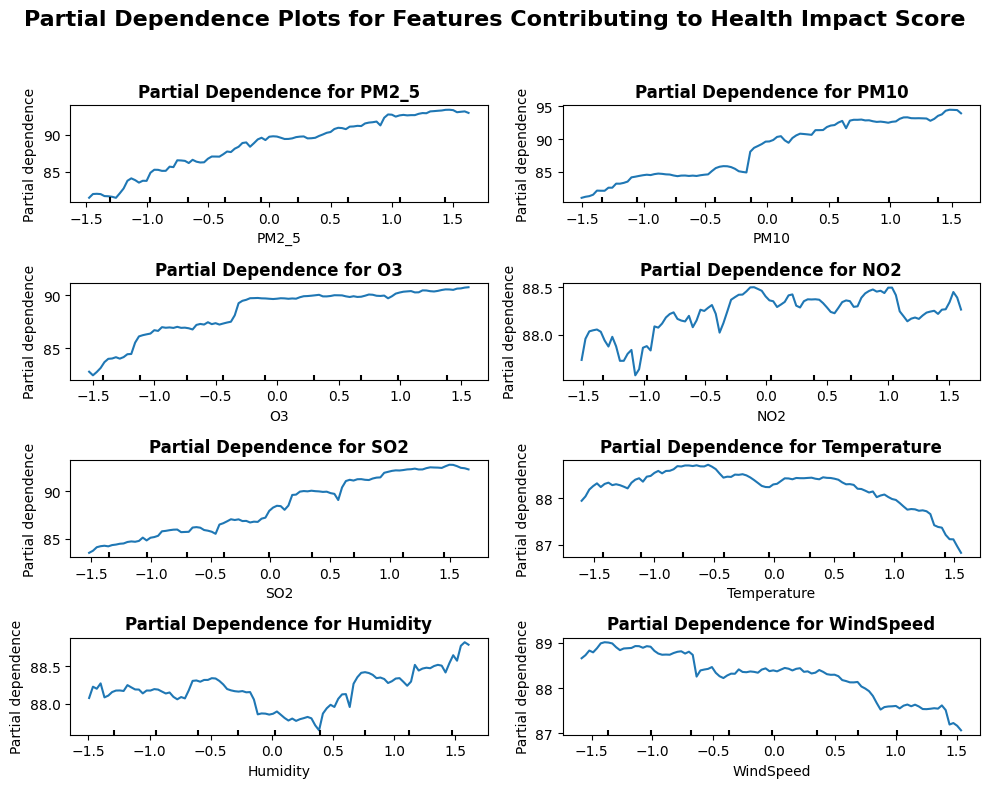

In [ ]:
features = ['PM2_5', 'PM10', 'O3', 'NO2', 'SO2', 'Temperature', 'Humidity', 'WindSpeed']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(best_rf_model, X_test_scaled, features=[i], feature_names=features, ax=axes[i])
    axes[i].set_title(f"Partial Dependence for {feature}", fontsize=12, fontweight='bold')

plt.suptitle("Partial Dependence Plots for Features Contributing to Health Impact Score", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

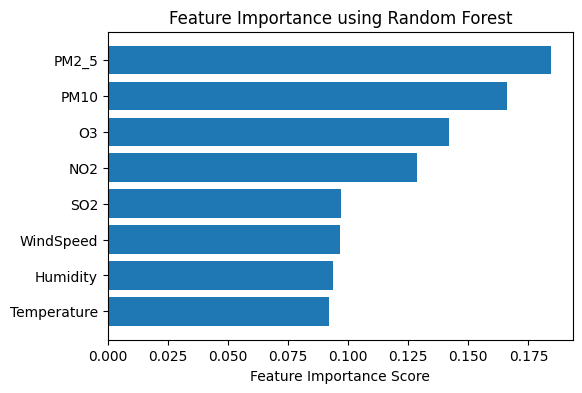

In [ ]:
# Feature Importance
importances = best_rf_model.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(6, 4))
plt.barh(np.array(selected_features)[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance using Random Forest")
plt.show()

Step 9: Incremental Learning

In [ ]:
# Incremental Learning with SGDRegressor
sgd = SGDRegressor(learning_rate='adaptive', eta0=0.01, max_iter=1000, random_state=42)
batch_size = 100
for i in range(0, len(X_train_scaled), batch_size):
    X_batch = X_train_scaled[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]
    sgd.partial_fit(X_batch, y_batch)

y_pred_sgd = sgd.predict(X_test_scaled)
print("\nSGDRegressor Results:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_sgd):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_sgd):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_sgd):.4f}")



SGDRegressor Results:
Mean Absolute Error: 12.1210
Mean Squared Error: 226.0623
R2 Score: 0.1598


Step 10: Save the Final Model

In [ ]:
# Save final pipeline
pipeline = {
    'scaler': scaler,
    'selector': selector,
    'model': best_rf_model
}

joblib.dump(pipeline, 'health_impact_pipeline.pkl')
print("Pipeline saved successfully!")

Pipeline saved successfully!


Step 11: Load and Use the Model

In [ ]:
# Load the pipeline
loaded_pipeline = joblib.load('health_impact_pipeline.pkl')

In [ ]:
# Create input widgets with range values
input_features = {
    'PM10''': (0, 300),
    'PM2_5': (0, 200),
    'NO2': (0, 200),
    'SO2': (0, 100),
    'O3': (0, 300),
    'Temperature': (-20, 40),
    'Humidity': (10, 100),
    'WindSpeed': (0, 20)
}

input_widgets = {}
for feature, (min_val, max_val) in input_features.items():
    input_widgets[feature] = widgets.FloatSlider(
        value=0,
        min=min_val,
        max=max_val,
        step=0.1,
        description=feature,
        continuous_update=False
    )

predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        clear_output()
        input_data = {feature: input_widgets[feature].value for feature in X.columns}
        input_df = pd.DataFrame([input_data], columns=X.columns)
        sample_scaled = loaded_pipeline['scaler'].transform(input_df)
        sample_selected = loaded_pipeline['selector'].transform(sample_scaled)
        prediction = loaded_pipeline['model'].predict(sample_selected)
        print(f"Predicted Health Impact Score: {prediction[0]}")

predict_button.on_click(on_predict_button_clicked)

for widget in input_widgets.values():
    display(widget)
display(predict_button)
display(output)

FloatSlider(value=0.0, continuous_update=False, description='PM10', max=300.0)

FloatSlider(value=0.0, continuous_update=False, description='PM2_5', max=200.0)

FloatSlider(value=0.0, continuous_update=False, description='NO2', max=200.0)

FloatSlider(value=0.0, continuous_update=False, description='SO2')

FloatSlider(value=0.0, continuous_update=False, description='O3', max=300.0)

FloatSlider(value=0.0, continuous_update=False, description='Temperature', max=40.0, min=-20.0)

FloatSlider(value=10.0, continuous_update=False, description='Humidity', min=10.0)

FloatSlider(value=0.0, continuous_update=False, description='WindSpeed', max=20.0)

Button(description='Predict', style=ButtonStyle())

Output()

**Features Contributing to Health Impact Score**


1.   PM2.5 -	Fine particulate matter strongly impacts respiratory health.
2.   PM10 -	Larger particulate matter also contributes to air pollution effects.
3.   NO2	- Nitrogen dioxide is linked to respiratory issues and cardiovascular diseases.
4.   SO2	Sulfur dioxide - is associated with lung disease and hospital admissions.
5.   O3 -	Ground-level ozone can cause breathing problems and worsen asthma.
6.   Temperature -	Higher temperatures can amplify air pollution effects.
7.   Humidity -	High humidity can increase pollutant retention in the air.
8.   Wind Speed -	Strong winds can help disperse pollutants, reducing their impact.


















**Validation of Feature Importance**

(a) Correlation Analysis

(b) Feature Selection :- Recursive Feature Elimination (RFE) was used to select the top features contributing to Health Impact Score.

(c) Feature Importance from Random Forest - The trained Random Forest model was analyzed for feature importance

(d) The Partial Dependence Plot (PDP) provided further evidence of how PM2.5, PM10, NO2, and O3 influence Health Impact Score.



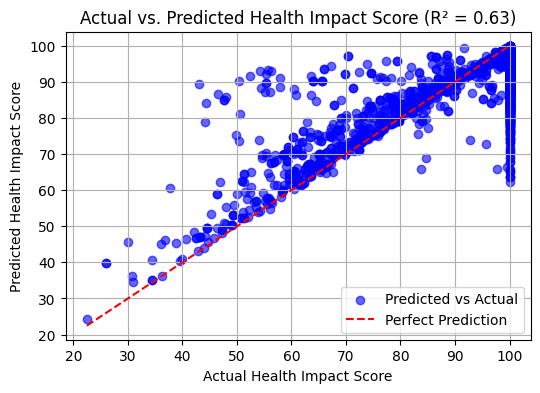

In [ ]:
# Actual vs. Predicted healthimpactscore
rf_model = results['Random Forest']['model']
y_pred = rf_model.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Health Impact Score")
plt.ylabel("Predicted Health Impact Score")
plt.title(f"Actual vs. Predicted Health Impact Score (R² = {r2:.2f})")
plt.legend()
plt.grid(True)
plt.show()